## Background / Motivation

Alcohol consumption is a phenomenon that has huge implications for policymakers, business leaders, and consumers. While alcohol is a part of everyday social life around the world, its abuse has large societal consequences, contributing to 3 million deaths each year and to 5.1% of the global burden of disease [1]. At the same time, alcohol also represents a huge opportunity for businesses and investors, who have to reconcile its harmful effects with its consistent and growing demand worldwide. The market for alcoholic beverages is estimated at roughly $1.7 trillion and has been growing by over 5% annually post-pandemic; there is especially high growth in countries like China and India as per-capita consumption and interest in premium options increases [2]. As a result of its large and multifaceted impact, institutions across society want to better understand the drivers of alcohol consumption. 

Through the exploration of demographic, cultural, and political data, we seek to create a regression that can predict alcohol consumption in every country worldwide in a target year. Alcohol consumption levels are influenced by factors including economic development, culture, availability of alcohol, and implementation and enforcement of alcohol policies [1]. Beyond these, there may be outcomes affected by alcohol use, such as the impact of alcohol on health outcomes, or differences in consumption such as gender differences, that can better predict alcohol consumption in different contexts worldwide. This type of comprehensive model will not only generate consumption predictions for each country, but also allow stakeholders to target interventions through explaining relationships between various factors and alcohol consumption. 


## Problem statement 

This regression will create predictions for per-capita alcohol consumption in every country, using cultural and demographic data from each country as predictors. We will use data in three years for which we have worldwide alcohol consumption data—2005, 2010, and 2015—and compare models generated by each to best predict consumption in 2019. Our primary aim is to accurately predict consumption in 2019; a secondary goal is inference, in understanding how each predictor affects alcohol consumption. We will compare the predicted and actual values of alcohol consumption in 2019 to determine which of the regressions from the three previous years best models worldwide alcohol consumption in 2019. 

## Data sources
The data that we used for our model and analysis is from this website: https://ourworldindata.org. This website provides yearly data from 1999-2019 for the average alcohol consumption per capita consumes in liters for every country in the world. We used this same website to get data for all of our predictors as well. The aggregations of the data include data from reputable sources like the WHO, various UN agencies, and more. The only data we used that was not from OurWorldInData was religion data, found from Wikipedia's aggregation of Pew Research data on religious populations in each country. 

## Stakeholders
Our data analysis has the potential to inform stakeholders across all sides of the business world as well as policy and research. 

When it comes to business and industry, key stakeholders are alcoholic product manufacturers and distributors, marketing agencies and consultancies with the former agents as clients, as well as individual investors and holding groups with investments in the alcohol industry. Quantitative insights from our analysis such as the predicted alcohol  consumption in the future can inform manufacturers in planning their production better, allocating resources and funding appropriately while alcohol retailers and vendors can improve their inventory planning and their decision-making around pricing. As for marketing agencies and consultancies, with the qualitative conclusions & recommendations derived from our research, which indicate specific qualities and demographics on the groups with higher alcohol consumption, they can optimize their consumer group targeting efforts and develop more robust strategy solutions for their clients, which could be alcohol-producing companies. For investors in the alcohol industry, our predictions on future alcohol consumption are vital in driving prospective investment decisions and understanding the current stability and picture of the market.

Regarding our analysis’ potential impact on the policy-making field, our predictions and qualitative insights can prove helpful to government, regulatory and other bodies with decision-making power in the public health policy space. As alcohol consumption at higher levels is a public health issue globally, predictions on future alcohol consumption have the ability to largely impact policy-makers across the world and provide ground for novel alcohol regulations where needed, as well as help understand where to focus public health campaigns.

Lastly, when it comes to research, our data analysis can help individual researchers and research institutions dedicated in areas such as  the effects of alcohol consumption on health and society to identify new intersections, potentially driving new areas of research or improving current research projects.


## Data quality check / cleaning / preparation 

In finding predictors to regress in this problem, we began by thinking qualitatively, using our intuition to find demographic variables that we thought would be associated with alcohol consumption. Later, we relied on some exploration of literature, such as the WHO’s commentary on alcohol consumption and alcoholism, to find more complex variables. In distributing labor, we each chose a subset of variables to explore. We first cleaned these variables independently, checking quality by ensuring that they were relevant, that most of the data was present, and that there were no erroneous values; after cleaning commas, strings, percentages, units, and more, and imputing missing data, we added the data to the respective dataframe. So, we quantitatively measured data quality after cleaning and adding all our variables to the project data. 

The first variable that was added was the dependent variable, alcohol consumption. OurWorldInData had this WHO data for a set of 202 countries and regions, with all values present in 2019. Since the data was measured in liters, the first step was to remove the units of measurement from the data. Some minor imputation was needed to fix less than 10 missing instances over all the years, such as Afghanistan in the Taliban regime or 2000s Sudan, where drinking was assumed to be around zero per capita, or for countries like Serbia and Montenegro which became independent nations during our window. 

The next variable we added was GDP per capita, which was measured in adjusted 2020 dollars from data from the World Bank. Cleaning this data involved removing dollar signs and commas from the data. There were many more countries and regions included in this dataset than for alcohol consumption, so left-merging with the consumption dataset fixed this issue. There were under 5% of missing values in each training/test dataset, each for different reasons; as such, we imputed missing data as the mean of the other GDP per capita values. Next, we added the percentage of the population that practices each religion by country. This data was found on Wikipedia, aggregated from Pew Research Center. Cleaning this data involved removing percents. Before even loading it in the dataset, another cleaning task involved standardizing the country names with the same names used in the alcohol dataset, to ensure merging did not remove any values; as an example, Congo was listed as Republic of Congo in Wikipedia. There were discrepancies with reporting values as zero, or not including them at all; we assumed all missing values were zero (ex: some Polynesian islands’ Jewish population). 

Another variable was democracy index, including extent of suffrage, the freedom and fairness of elections, freedoms of association and expression, calculated through Luhrmann et al (2018)’s political science research. Missing values here indicated countries who do not report some of these metrics, and were assumed to be zero. The education predictor measures the average number of completed years of education of a country's population aged 25 years and older, from the UN Development Programme. There were less than 5% of missing values in each train and test year, so we imputed as the mean of the other observations. 

The wine predictor was one that measures wine production in each country. Naturally, few have the climate conditions to grow grapes, so roughly 40% were missing any data. We assumed that these were all zero, and as we later found, this was not a useful predictor due to issues of confounding with the population predictor.

To add the depression, smoking and homicide predictors from the OurWorldInData source, we copied and pasted data for each of our training years, 2005, 2020 and 2015, as well as the test year 2019, in separate Google Sheets and then converted them to individual CSV files as we have had the most familiarity importing data in that format in class assignments.

To start off with the smoking predictor, we converted all values to float format and percentages in decimal forms, as well as removed the % signs. Checking for missing values was only possible after we merged each of the smoking15, smoking10 and smoking05 dataframes created with the respective training datasets df15, df10 and df05 (and matching them on country) as only then were we able to see which countries that existed in the training datasets with all predictors weren’t included in my individual predictor datasets. For the smoking predictor especially, checking for missing values after merging resulted in 41 NaN values, which was a pretty significant amount to ignore. Given that we were dealing with countries, each having radically different smoking rates, imputing the mean here was not a measure we deemed appropriate and thus we decided not to move forward with the smoking predictor.

Moving on to the depression and homicide predictor, during data cleaning,  we had to remove the commas that existed in the values of both of these predictors and convert the type of the values to float for calculations. The homicide and depression dataframes were relatively clean, with much less missingness in values, which made them appropriate predictors to move forward with.

The last step taken to make those predictors useful for our project was to derive two new variables , “Depression_rate” and “Homicide_rate”, which we did by dividing the total number of depressed individuals and deaths attributed to homicide, respectively, by the population of each country to get the rates.

In checking data quality, the null counts and variable distributions are shown in the appendix (See Figures 1.1-1.4). We were successful in removing almost all null values through imputation, with negligible remaining counts. The distributions were as expected in most cases, and we explore transformations in the subsequent section. 

## Exploratory data analysis

Put the relevant EDA here (visualizations, tables, etc.) that helped you figure out useful predictors for developing the model(s). Only put the EDA that ended up being useful towards developing your final model(s). 

List the insights (as bullet points) you got from EDA that ended up being useful towards developing your final model. 

Again, if there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

By conducting some basic exploratory data analysis, such as checking for the correlation with alcohol consumption, “Homicide_rate '' seemed a pretty insignificant predictor, having a negligible negative correlation of -0.04 with consumption, which was verified as we visualized it.

We decided to move forward by checking for possible transformations and thus attempting to take the square, cube, square root and inverse of homicide_rate. The only significant difference seen in correlation happened by transforming using the inverse of homicide_rate, which raised the correlation from 0.04 to 0.18 units. However, that is still a quite low correlation, and since the model fit for Alcohol_Consumption against Inverse_homicide_rate yielded an R-squared of 0.033 only, we decided not to move forward with this particular predictor.

When it comes to Depression_rate, the initial correlation we got with alcohol consumption was approximately 0.38, and they seemed to have a moderate linear relationship. (See Figure 2.1 in Appendix). 

Attempting transformations such as log, square, cube, square root and inverse to improve the relationship with alcohol consumption here yielded no useful alternatives. The model of Alcohol_Consumption with depression_rate being the sole predictor gave us an R-squared of 0.144, and plotting the regression line & confidence intervals gave us the following plot (See Figure 2.2 in Appendix). 

Our EDA on depression_rate seemed to deem it quite useful of a predictor, so we decided to continue exploring how to include it in our model. 

As for multicollinearity concerns, we checked for how correlated depression rate was with other predictors and derived some helpful insights. Depression rate has a moderately high correlation with drug_deaths and median_age. We thus decided to explore the options of using interaction terms or removing either of these predictors in the model development stage, as well as try regularization (Ridge/Lasso)  to address these concerns.

For GDP per capita, the initial plot of GDP vs alcohol consumption showed a concentration of the GDP data around the $0-10,000 per capita, so based on the following visualization, a log transformation seemed like a logical transformation to explore. (See Figure 1.3)

As seen in the following figure, the log transformation seemed to normalize the scatter of the data. The R^2 of the log transformed relationship increased by 0.04 between the two plots, so this was a helpful transformation to better model this relationship. (See Figure 1.4)

The wine predictor turned out to not be a useful one for this regression. In addition to having a median production of zero, the predictor appeared to be confounded by population—countries with both higher rural and urban populations tended to have greater wine production. As a result of these factors, we decided this was not a useful variable to include. 

The religion variable was a likely one to suffer from collinearity. Through EDA of each of the relationships, we decided that Islam and Christianity would be two logical ones to include. Unlike the other religions, for which almost all countries had percentages close to zero, most countries had a substantial Christian population. And for Islam, although the median country had a Muslim population percentage of ~3%, the prohibition of alcohol in Islam was a key factor for including it in our subset of variables on which to apply variable selection techniques.

Education and democracy were both predictors that had reasonably strong R^2 with alcohol consumption, and which were unimproved by transformations. These variables were fairly normally distributed as well. As such, we included them in our model selection techniques with no transformations.

Population was added as a way to scale other predictors, as well as a possible variable that could be used in order to predict Alcohol Consumption itself. The reasoning was that the higher the population of a country, the higher the number of people that are able to become alcoholics or the higher the chance of systemic issues that would result in higher alcoholic consumption. Ultimately, however, there were too many outliers with population that rendered any possible interaction useless, as even with the outliers removed there was no clear relationship that could be seen. 

Electricity access per population (elec_acc_pct_pop) showed even less promise than Population. Most countries were at 100% electricity access, and even with those countries removed there was again no clear relationship between electricity access and Alcohol Consumption. Median age was the only variable that showed any real promise in being a predator. Median age showed a clear general positive correlation with Alcohol Consumption as well as a clear interaction between Education level and log_GDP.  Drug Deaths per 100,000, when plotted against Alcohol Consumption, showed a slight resemblance to a log graph. In order to fit for that, drug deaths per 100,000 was logged, which showed a slight improvement to the previous graph. The percent of a country that was female (pct_female) was a variable that did not show much promise in EDA. The few missing observations were treated by setting them equal to 50%, assuming that there was an equal ratio between men and women. Ultimately, however, the data exploration into percent female did not show any clear correlation between Alcohol Consumption and pct_female, although it was used as a good interaction term. 


## Approach

We used a linear regression model to predict alcohol consumption for every country in the world. We considered a logistic transformation of alcohol consumption, but determined that it was ineffective in our code file. In determining model fit, we decided to optimize MAE since we want to weigh all errors equally; it did not make sense in this case to additionally penalize larger errors, since larger mispredictions of alcohol consumption do not present any larger danger to stakeholders or to the integrity of our model. We initially performed EDA for every predictor against the response to find some possible interactions and transformations. To do this, we created models and used the process of trial and error to see which ones worked best. Of course, this was a naive approach, and so we tried a computational technique, forward selection, in the next section to find all of the best interaction terms. 

We anticipated that the elimination of predictors was going to be another limitation with our limited computational power. To find a subset of predictors, we relied on our EDA and on our intuition. As an example, removing the irrelevant religions was a finding supported both by data, and by anecdotal evidence about the importance of including Islam. However, there are likely dozens of other relevant predictors that we could not clean and add to this regression. At first, we tried a combination of interactions and variables that we decided through our own intuition; that said, once we found interactions through computation, we were able to achieve a superior model fit. A unique challenge of this problem was that no online solution exists; it was a novel approach to try to predict alcohol consumption, and especially considering the large and diverse set of predictors that we considered.

## Developing the model

To develop the model, each person on our team tried different alternative fitting procedures to yield better prediction accuracy and model interpretability such as best subset selection, stepwise, lasso and ridge regression. We then all compared our insights from performing each technique to see which one improved our prediction accuracy best by looking at the BIC criterion for best subset and forward/backward stepwise. Lasso and ridge were difficult with our approach; in shrinking coefficients towards zero, they were yielding poorly-predicting models, when multicollinearity was already not a concern with the results from our other variable selection techniques due to our selection of the subset we ran this on.

#### Best Subset

Now that all the variable relationships have been identified, a good starting point in creating a model is Best Subset selection. Best Subset selection fits every possible model that includes K predictors, for every value of K from 1 to the size of the subset. While computationally inefficient, especially with this large of a subset, it finds the best fitting models for each criterion, which cannot be guaranteed by the subsequent selection methods. To balance our concerns of maximizing goodness-of-fit while preventing overfitting, the Bayesian Information Criterion was useful in assessing model strength.

We identified a subset of 16 predictors on which to run Best Subset selection. These can be viewed in the appendix. (See Figure 3.1)

The runtime of best subset selection was an extreme limitation. It took between 12 and 15 minutes depending on the size of the subset. It would have been logical to try best subset selection with interaction terms, but the runtime was infeasible. 

Best Subset selection gave us a model with five variables, when evaluated through the BIC. This model was the same as the one generated in the next step, so we will explore it in the below section.

#### Forward & Backward Stepwise selection

As a more computationally efficient alternative to Best Subset selection, we also decided to try the Forward & Backward stepwise variable selection techniques with the same starting subset of predictors used in Best Subset.

We first attempted this technique without interaction terms involved. 

Based on the BIC metric, our best model both through Forward and Backward Step-wise came out to be one with 5 predictors, Christian, Median_age, percent_Female, depression_rate and Log_Suicide_Rate. (See Figure 3.2)


This model had an R-squared of 0.543, and below is the plot of residuals. (See Figure 3.3).

#### Interaction terms

Finally, given that it was impossible to identify interaction terms using best subset selection, we ran forward stepwise selection on a subset of predictors that included the original 16, and all two-factor interaction terms between them. The findings were surprising: as seen below, the BIC criterion selected a model with 8 terms, 7 of which were interaction terms. (See Figure 3.4). Suicide death rate was the one non-interaction term present in this model, and had not been included in the previous model developed through Best Subset/Forward and Backward Selection. 

That said, the model developed using interaction terms had a remarkable improvement over the original model. The adjusted R^2 increased by 0.1, from ~0.5 to 0.6, with the presence of interaction terms in the model. It is reassuring to know that the BIC chose this model, and that we don’t need to worry as much about this model having overfit as a result. 


#### Autocorrelation

Autocorrelation was an important factor to consider in our model. However, the training data used in our model only had three separate years able to be considered, as such we only tested autocorrelation for the 2015 dataset and 2005 dataset, and the 2015 dataset and 2010 dataset. If we had a larger period of years to consider, we do believe that autocorrelation would have been an appropriate term to use in our model. However, in our case adjusting for autocorrelation actually had a negative impact on our model. When testing a model that included five years lag, the RMSE and MAE stayed roughly the same (increasing by 0.0001), and when testing a model that included ten years lag, the same result occurred. Perhaps with a larger time series frame to consider, autocorrelation may be an effective variable to include in our model calculation, however, in our case autocorrelation was actually a detrimental factor rather than a beneficial one.


## Limitations of the model with regard to inference / prediction

Ultimately, our model was not the best for prediction. The naive model showed a deviation of roughly 4L, which when compared to our model’s MAE of roughly 2L shows an improvement, although one that could have been better. As it stands now, our model will be approximately 2L in magnitude off when predicting the alcohol consumption of a country, which is not accurate enough to base entire marketing strategies and company-wide Alcohol-based decisions upon. In terms of our dataset, 2L makes a world of a difference in Alcohol Consumption. On the other hand, however, our model has given us a very clear idea of what sort of factors are important to look at when considering the amount of alcohol a country may consume. These types of factors are median age, logged GDP, Muslim percentage, etc. and would prove beneficial for a company to decide what sort of country would be more likely to consume more of their alcoholic beverages. Therefore, while our model may not be able to accurately predict the average alcohol consumption of a country, it did prove useful in determining what sort of factors are best able to influence the level of alcohol consumption.

Ridge and Lasso were not effective techniques to use in our case, as Lasso requires a few predictors that are substantially more important in predicting the response than the others, which as shown from our EDA was not the case in our model. Ridge requires most of the variables to be roughly equal in importance in predicting the response, which again was not the case in our model, as many predictors were outright useless or showed only a very slight correlation with the response. These factors caused any technique using ridge or lasso to result in a lower Rsquared metric as well as a higher RMSE and MAE than a model developed using any other technique.


## Conclusions and Recommendations to stakeholder(s)

Based on our model, we draw the conclusion that median age, education, percentage of females, and depression rate are the most significant predictors of alcohol consumption. We drew this conclusion from the fact that our interaction model included these predictors in its model, which, when combined with the EDA done before, show that these few predictors had the greatest relationship with Alcohol Consumption. We also believe it better not to include the interaction terms themselves as a significant predictor as, since we concluded that our model is better for inference and not prediction, it would be easier to interpret predictors that are not interacting with one another.  Stakeholders in the marketing industry can use this information to target their campaigns towards countries with higher alcohol consumption levels, while those in the legal industry can use it to regulate alcohol consumption in countries with high depression and suicide rates since these factors also highly contribute to heavy alcohol usage. We suggest that stakeholders in the marketing industry develop targeted campaigns that focus on the identified predictors of alcohol consumption, such as age, education, gender, and depression rates. For instance, campaigns targeting younger people may be more effective in countries with lower median age, while campaigns that highlight the health risks associated with alcohol consumption may be more effective in countries with higher depression rates. For stakeholders in the legal industry, we recommend that they use the identified predictors to create policies that address the underlying causes of high alcohol consumption, such as depression rates, education levels, and gender disparities. For instance, implementing educational programs that promote responsible alcohol consumption or providing access to mental health services may be effective in reducing alcohol consumption in countries with higher depression rates. It's important to note that our model has certain limitations, and stakeholders should be aware of them before implementing our recommendations. For instance, our model may not be accurate in predicting alcohol consumption levels in all situations, and additional analysis or domain expertise may be required to make our recommendations practically implementable. Finally, our model can be used in the future to predict alcohol consumption levels, but stakeholders should consider updating the model periodically based on recent data to ensure its accuracy. The frequency of model updates may depend on various factors, such as changes in the underlying predictors of alcohol consumption or changes in the data used to train the model.

## GitHub and individual contribution {-}

https://github.com/sarahabdul2/STAT-303-2-Project-

Add details of each team member's contribution in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Nathan Jung </td>
    <td>Data cleaning/EDA/Regularization/Model Development/ Addressed autocorrelation</td>
    <td>Cleaned data to find useful interactions/transformation, performed ridge regression to find useful predictors, and contributed to developing the final model, and addressed autocorrelation.</td>
    <td>146</td>
  </tr>
  <tr>
    <td>Christina Tzavara</td>
    <td>Data cleaning/EDA/Variable Selection/Model Development</td>
    <td>Cleaned data, performed transformations, performed Forward/Backward Stepwise, and contributed to final model development.</td>
    <td>101</td>
  </tr>
    <tr>
    <td>Sarah Abdulwahid</td>
    <td>Data cleaning/EDA/Regularization</td>
    <td>Cleaned data to find useful interactions and transformations and performed Lasso regression to improve model fit.</td>
    <td>146</td>    
  </tr>
    <tr>
    <td>Vaynu Kadiyali</td>
    <td>Data cleaning/EDA/Model selection</td>
    <td>Cleaned data to find useful interactions and transformations. Performed best subset selection technique to improve model fit. Formatting of code and report. </td>
    <td>153</td>    
  </tr>
</table>

Collaboration was quite difficult on GitHub. It was particularly troublesome while simultaneously working on a file and having to manually resolve many conflicts that would arrive with merging.

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] WHO. Harmful use of Alcohol: Impact and WHO Response. https://www.who.int/health-topics/alcohol#tab=tab_1
[2] Statistica. Consumer Market Insights: Alcoholic Drinks - Worldwide. https://www.statista.com/outlook/cmo/alcoholic-drinks/worldwide



## Appendix {-}

#### Figure 1.1

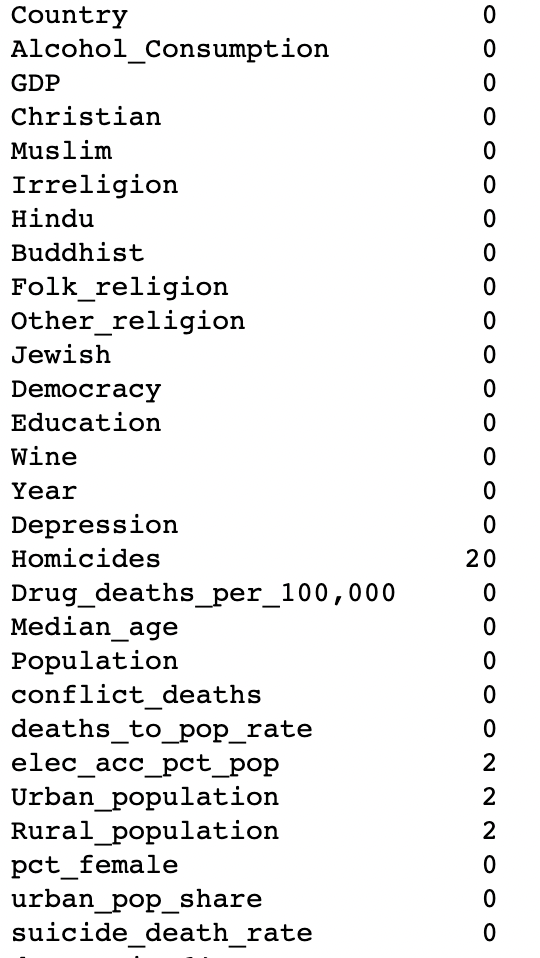

#### Figure 1.2

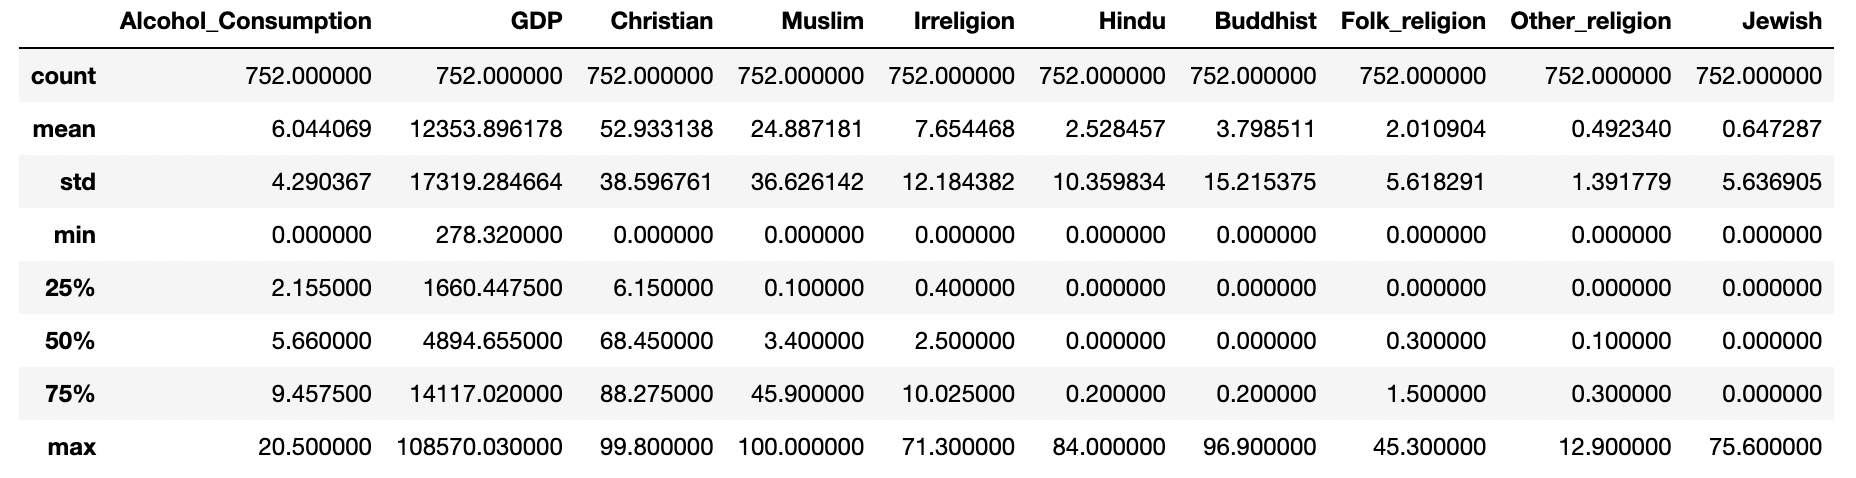

#### Figure 1.3

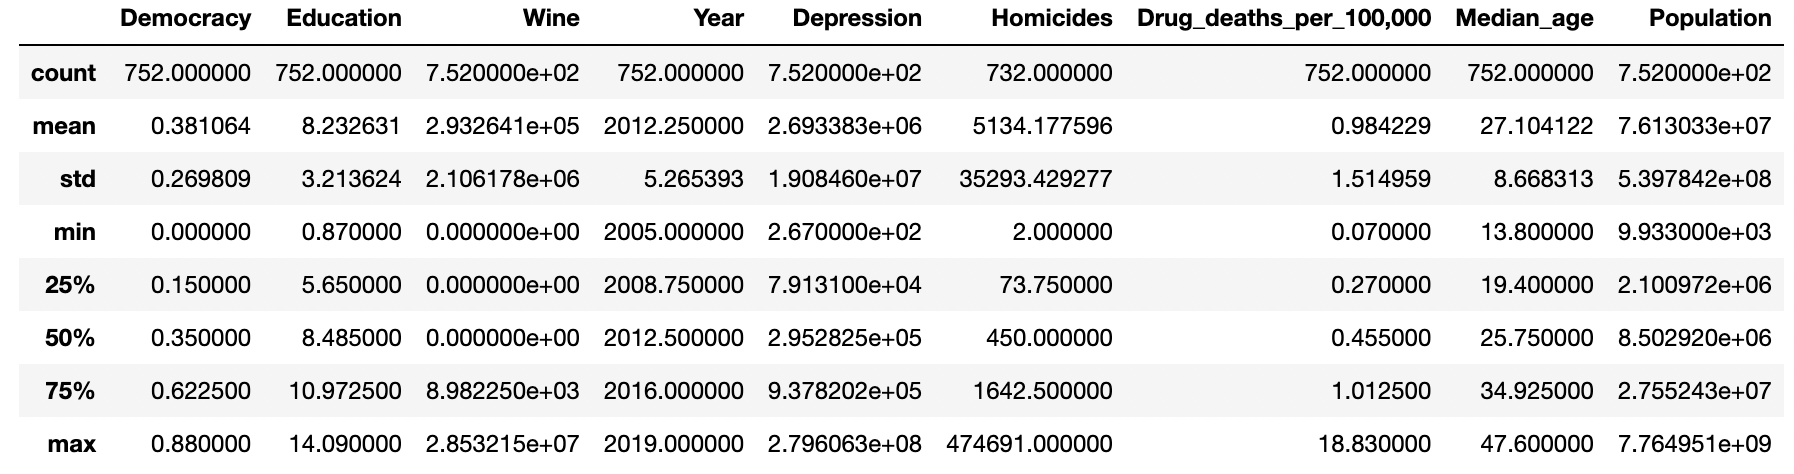

#### Figure 1.4

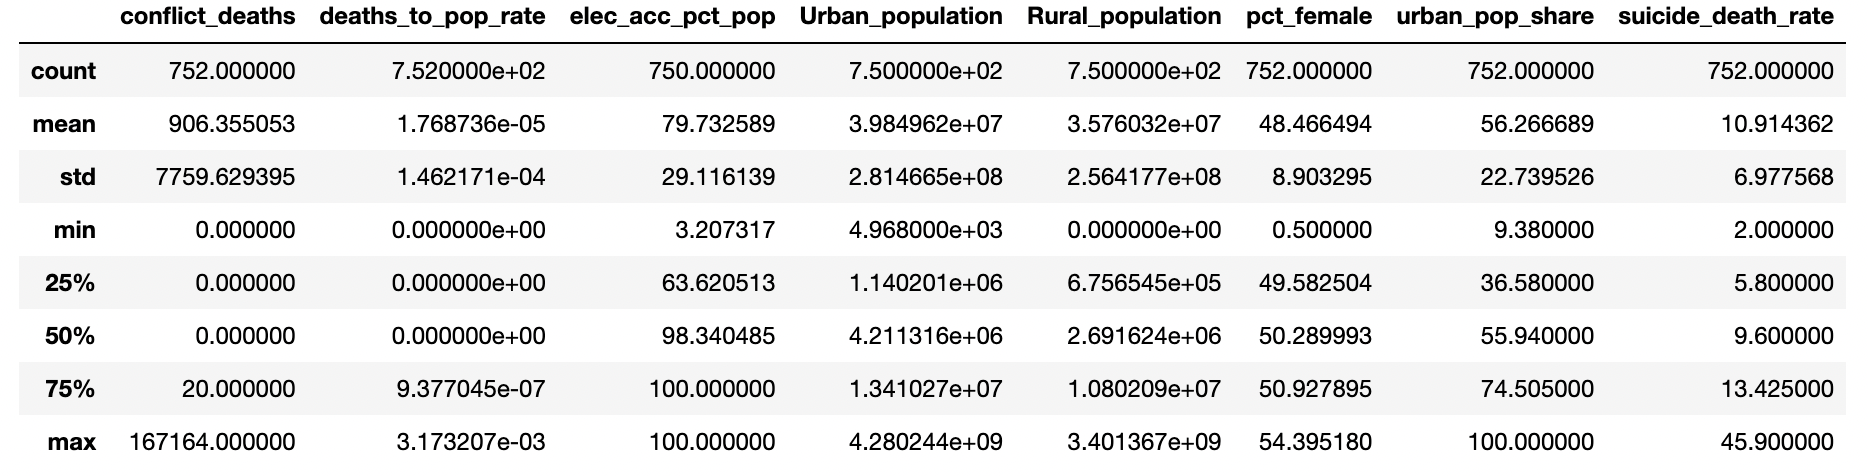

#### Figure 2.1

#### Figure 2.2

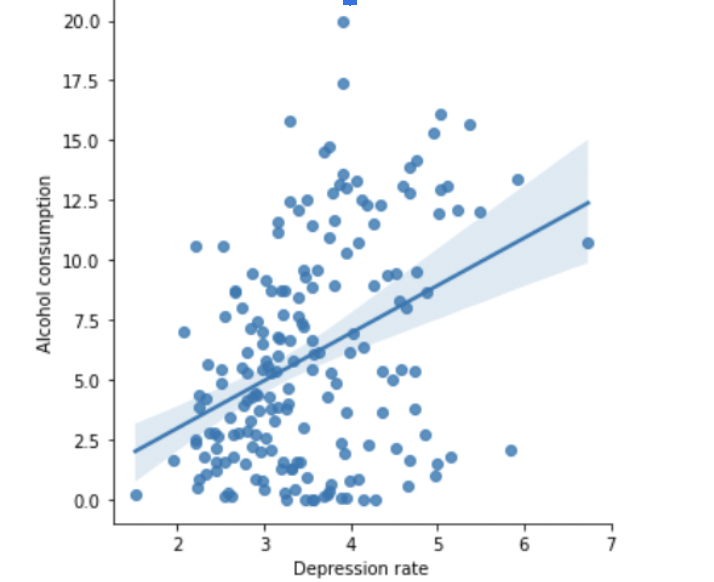

#### Figure 2.3

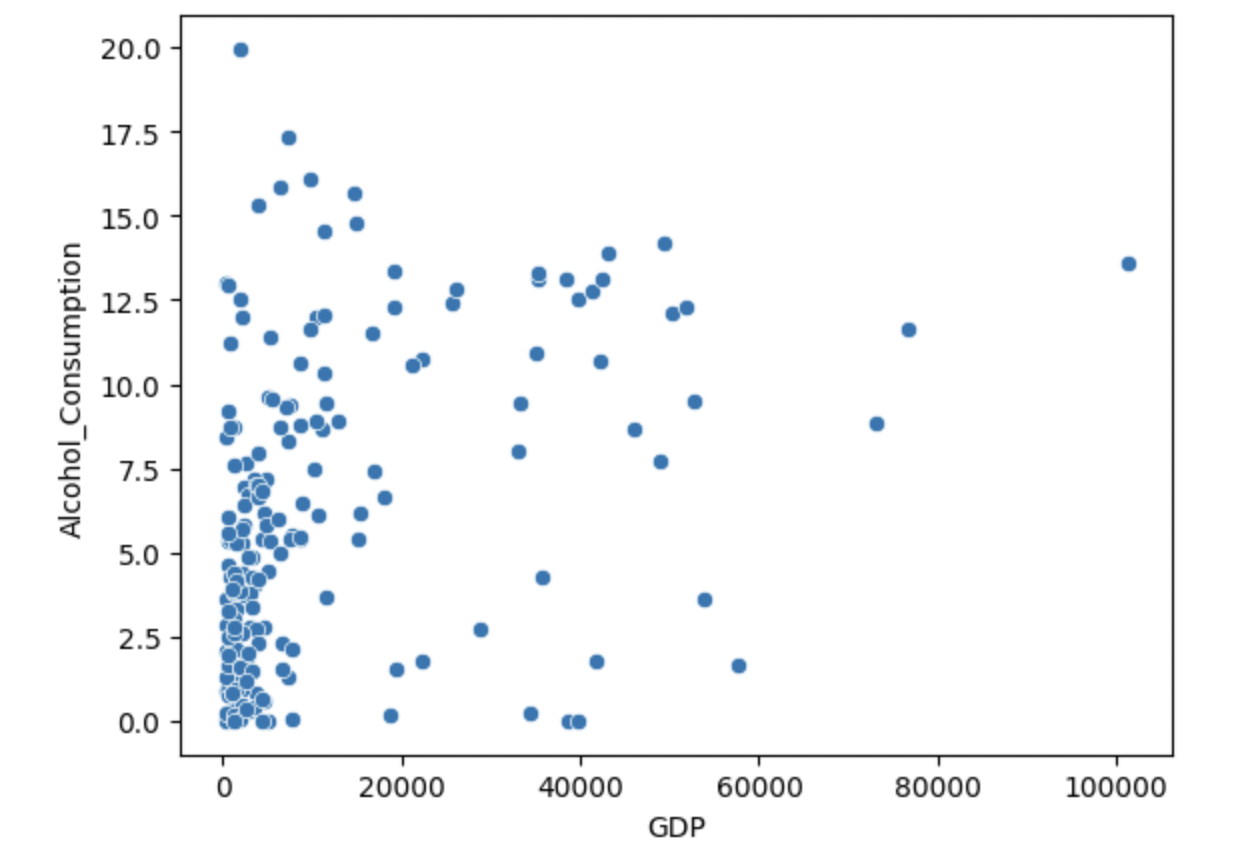

#### Figure 2.4

#### Figure 3.1

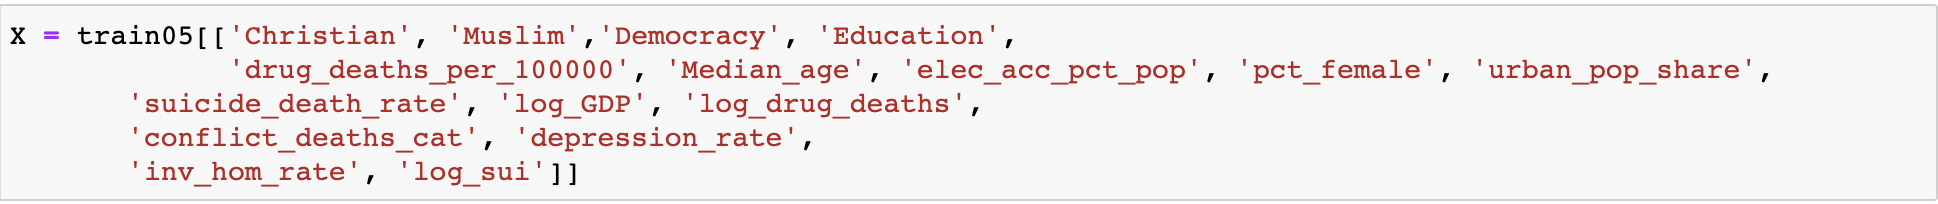

#### Figure 3.2

#### Figure 3.3